# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
!pip install citipy

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'b20d9af8a0750e703cbfb26e92bd5be9'

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 649


---

In [6]:
cities

['nikolskoye',
 'pamanukan',
 'albany',
 'busselton',
 'atuona',
 'hastings',
 'rikitea',
 'fairbanks',
 'butaritari',
 'tiksi',
 'taolanaro',
 'enid',
 'sechura',
 'ostersund',
 'new norfolk',
 'sentyabrskiy',
 'saint-philippe',
 'port hedland',
 'ushuaia',
 'carutapera',
 'provideniya',
 'maniitsoq',
 'avarua',
 'namibe',
 'sjovegan',
 'marathon',
 'jamestown',
 'bluff',
 'thompson',
 'itarema',
 'kristiinankaupunki',
 'touros',
 'savannakhet',
 'nuevo progreso',
 'vigrestad',
 'saint anthony',
 'upernavik',
 'tuktoyaktuk',
 'mataura',
 'mar del plata',
 'lincoln',
 'nefteyugansk',
 'barrow',
 'brae',
 'novyy urgal',
 'svay rieng',
 'necochea',
 'nome',
 'solvychegodsk',
 'bataipora',
 'opuwo',
 'ancud',
 'dikson',
 'quatre cocos',
 'vao',
 'amderma',
 'oktyabrskiy',
 'lolua',
 'riberalta',
 'atar',
 'hithadhoo',
 'cherskiy',
 'kungurtug',
 'chicama',
 'vaini',
 'punta arenas',
 'bredasdorp',
 'breyten',
 'ribeira grande',
 'saint-georges',
 'siparia',
 'sarakhs',
 'narsaq',
 'toamas

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=b20d9af8a0750e703cbfb26e92bd5be9&q=san francisco


In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | pamanukan
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | hastings
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | fairbanks
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | enid
Processing Record 13 of Set 1 | sechura
Processing Record 14 of Set 1 | ostersund
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | port hedland
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | carutapera
Processing Record 21 of Set 1 | provideniya
Processing Reco

Processing Record 40 of Set 4 | falealupo
City not found. Skipping...
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | perleberg
Processing Record 43 of Set 4 | gijon
Processing Record 44 of Set 4 | talnakh
Processing Record 45 of Set 4 | stornoway
Processing Record 46 of Set 4 | udachnyy
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | leh
Processing Record 0 of Set 5 | basoko
Processing Record 1 of Set 5 | macapa
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | merauke
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | wembley
Processing Record 8 of Set 5 | niesky
Processing Record 9 of Set 5 | nabire
Processing Record 10 of Set 5 | el alto
Processing Record 11 of Set 5 | ponto novo
Processing Record 12 of Set 5 | nguiu
City not found. Skipping...
Process

Processing Record 27 of Set 8 | sri aman
Processing Record 28 of Set 8 | nzerekore
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | te anau
Processing Record 31 of Set 8 | viedma
Processing Record 32 of Set 8 | nishihara
Processing Record 33 of Set 8 | beringovskiy
Processing Record 34 of Set 8 | nata
Processing Record 35 of Set 8 | korablino
Processing Record 36 of Set 8 | oyon
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | anar darreh
City not found. Skipping...
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | turukhansk
Processing Record 41 of Set 8 | bustamante
Processing Record 42 of Set 8 | santarem
Processing Record 43 of Set 8 | lar gerd
City not found. Skipping...
Processing Record 44 of Set 8 | carroll
Processing Record 45 of Set 8 | cidreira
Processing Record 46 of Set 8 | pine bluff
Processing Record 47 of Set 8 | najran
Processing Record 48 of Set 8 | illoqqortoormiut
City not found. Skipping...
Proce

Processing Record 14 of Set 12 | letlhakane
Processing Record 15 of Set 12 | bandarbeyla
Processing Record 16 of Set 12 | lorengau
Processing Record 17 of Set 12 | rathenow
Processing Record 18 of Set 12 | lufilufi
Processing Record 19 of Set 12 | coruripe
Processing Record 20 of Set 12 | binika
Processing Record 21 of Set 12 | lobito
Processing Record 22 of Set 12 | hermiston
Processing Record 23 of Set 12 | novi bilokorovychi
Processing Record 24 of Set 12 | durban
Processing Record 25 of Set 12 | huarmey
Processing Record 26 of Set 12 | boffa
Processing Record 27 of Set 12 | bandiagara
Processing Record 28 of Set 12 | kuching
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | ferme-neuve
Processing Record 31 of Set 12 | progreso
Processing Record 32 of Set 12 | labuhan
Processing Record 33 of Set 12 | havelock
Processing Record 34 of Set 12 | dondo
Processing Record 35 of Set 12 | mujiayingzi
Processing Record 36 of Set 12 | broome
Processing Record 37 of Set 12 |

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,1.94,95,100,4.30,RU,1675909618
1,pamanukan,-6.2842,107.8106,28.89,66,100,3.29,ID,1675909619
2,albany,42.6001,-73.9662,2.39,78,62,0.89,US,1675909331
3,busselton,-33.6500,115.3333,24.16,46,0,4.30,AU,1675909619
4,atuona,-9.8000,-139.0333,26.18,78,27,9.69,PF,1675909619


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,1.94,95,100,4.30,RU,1675909618
1,pamanukan,-6.2842,107.8106,28.89,66,100,3.29,ID,1675909619
2,albany,42.6001,-73.9662,2.39,78,62,0.89,US,1675909331
3,busselton,-33.6500,115.3333,24.16,46,0,4.30,AU,1675909619
4,atuona,-9.8000,-139.0333,26.18,78,27,9.69,PF,1675909619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

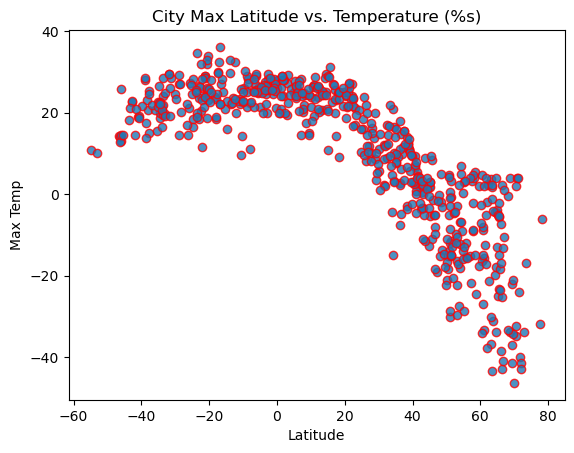

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"


)


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Max Latitude vs. Temperature (%s)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

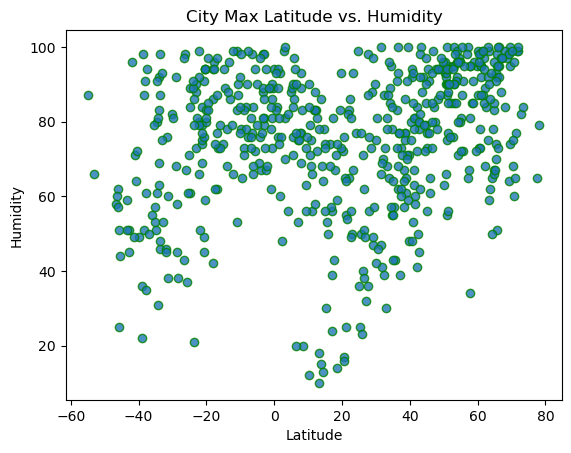

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"


)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

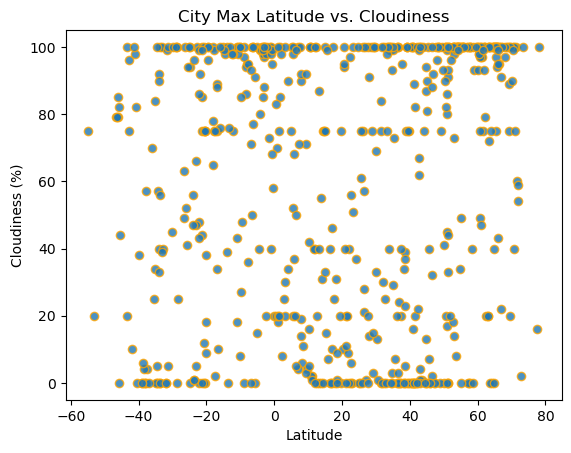

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"


)


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

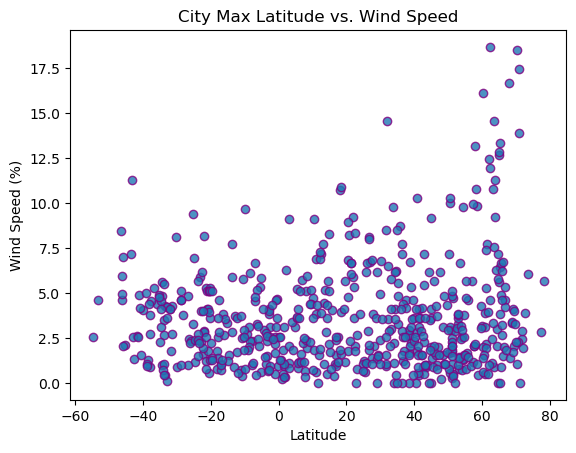

In [16]:
# Build the scatter plots for latitude vs. wind speed
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"


)
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,1.94,95,100,4.30,RU,1675909618
2,albany,42.6001,-73.9662,2.39,78,62,0.89,US,1675909331
5,hastings,50.8552,0.5729,4.73,55,80,2.97,GB,1675909619
7,fairbanks,64.8378,-147.7164,-13.00,83,40,0.00,US,1675909620
8,butaritari,3.0707,172.7902,27.40,81,30,9.13,KI,1675909620


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pamanukan,-6.2842,107.8106,28.89,66,100,3.29,ID,1675909619
3,busselton,-33.6500,115.3333,24.16,46,0,4.30,AU,1675909619
4,atuona,-9.8000,-139.0333,26.18,78,27,9.69,PF,1675909619
6,rikitea,-23.1203,-134.9692,26.58,73,5,5.90,PF,1675909620
11,sechura,-5.5569,-80.8222,24.94,72,91,5.32,PE,1675909622


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7228633944709146


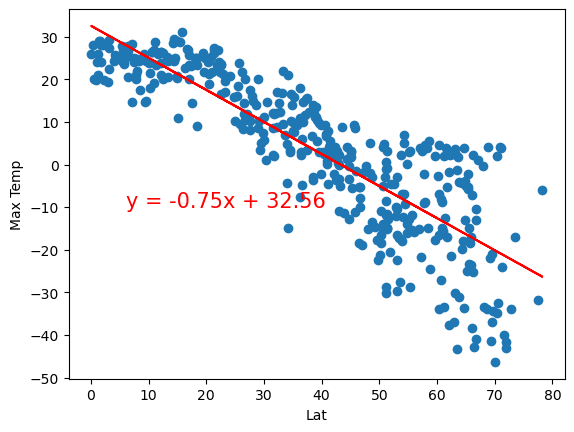

In [29]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is 0.17701542696243944


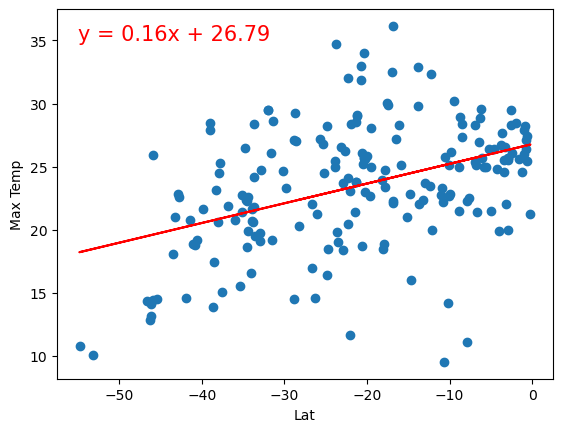

In [30]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.12709363642059585


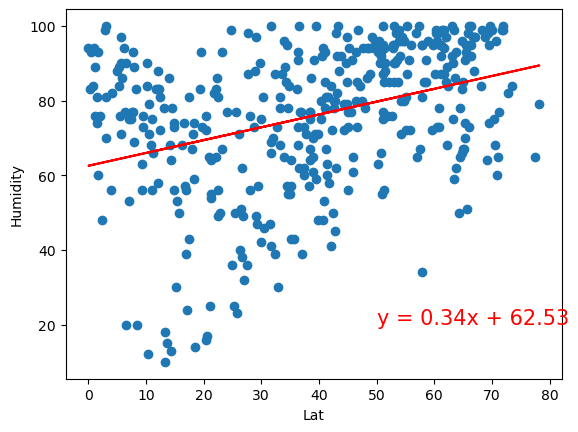

In [31]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.18529830262083294


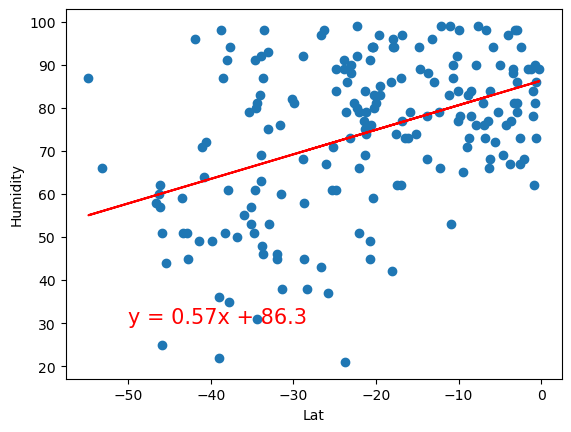

In [33]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08472516372773249


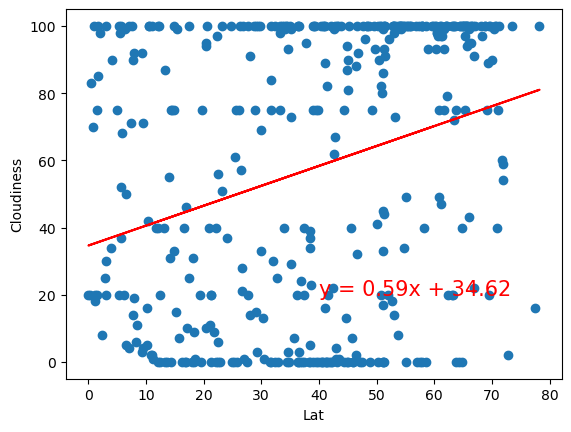

In [34]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 20))

The r-value is 0.1083391185908915


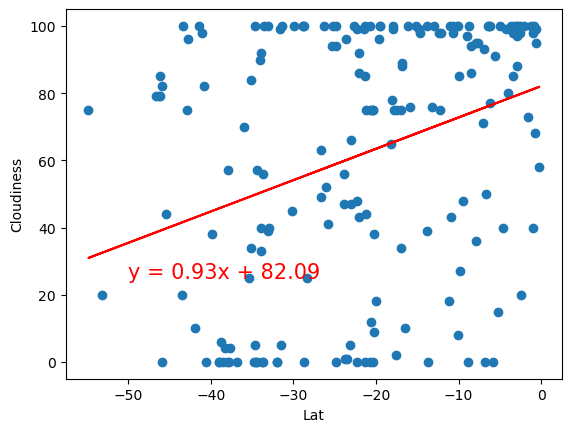

In [37]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.02382332820674833


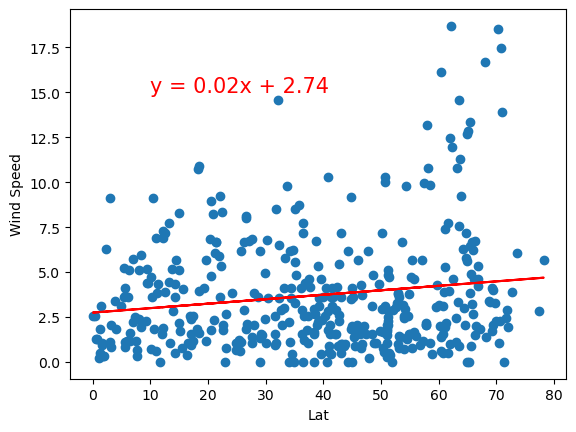

In [39]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.03777117326184329


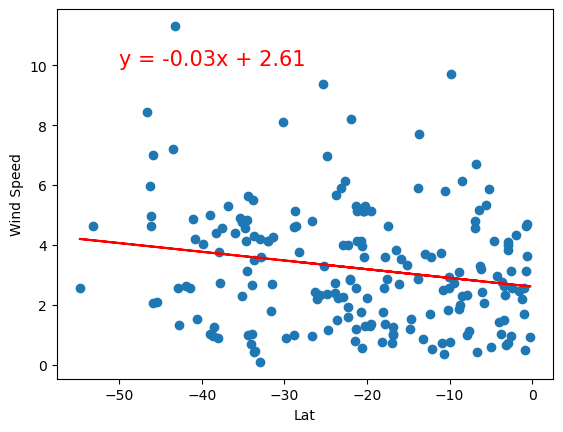

In [40]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE